In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

np_X_data_1 = np.load('np_X_data.npy')
np_Y_data_1 = np.load('np_Y_data.npy')

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(
    weights='imagenet',
    include_top=False,
    pooling='avg',
    input_shape=(299,299,3)
)

W0816 12:57:44.334158 4512454080 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
list_of_accuracy=[0.11,0.12,0.13,0.14,0.19,0.20]
set_of_accuracy=[]
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = inception.predict(X_train)
    test_features = inception.predict(X_test)
    clf = Classifier()
    clf.fit(training_features, y_train)
    y_predict = clf.predict(test_features)
    acc = clf.score(test_features, y_test)
    set_of_accuracy.append(acc)

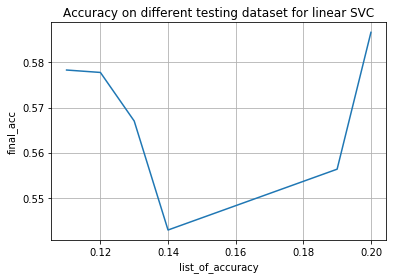

In [4]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for linear SVC')
grid(True)
show()

SGDClassifier, GradientBoostingClassifier, RandomForestClassifier, DeDecisionTreeClassifier and GaussianNB

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
list_of_accuracy=[0.11,0.12,0.13,0.14,0.19,0.20]
set_of_accuracy_sgd=[]
set_of_accuracy_gbc=[]
set_of_accuracy_rfc=[]
set_of_accuracy_gnb=[]
set_of_accuracy_dtc=[]
for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features = inception.predict(X_train)
    test_features = inception.predict(X_test)
    clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    clf_sgd.fit(training_features, y_train)
    y_predict = clf_sgd.predict(test_features)
    acc = clf_sgd.score(test_features, y_test)
    set_of_accuracy_sgd.append(acc)  
    clf_gbc = GradientBoostingClassifier()
    clf_gbc.fit(training_features, y_train)
    y_predict_gbc = clf_gbc.predict(test_features)
    acc_gbc = clf_gbc.score(test_features, y_test)
    set_of_accuracy_gbc.append(acc_gbc)  
    regr =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    regr.fit(training_features, y_train)
    y_predict_regr = regr.predict(test_features)
    acc_regr = regr.score(test_features, y_test)
    set_of_accuracy_rfc.append(acc_regr)
    gnb = GaussianNB()
    gnb.fit(training_features, y_train)
    y_predict_gnb = gnb.score(test_features, y_test)
    acc_gbn = gnb.score(test_features, y_test)
    set_of_accuracy_gnb.append(acc_gbn)  
    clf_dtc = DecisionTreeClassifier(random_state=0)
    clf_dtc.fit(training_features, y_train)
    y_predict_dtc = clf_dtc.score(test_features, y_test)
    acc_dtc = clf_dtc.score(test_features, y_test)
    set_of_accuracy_dtc.append(acc_dtc)   

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


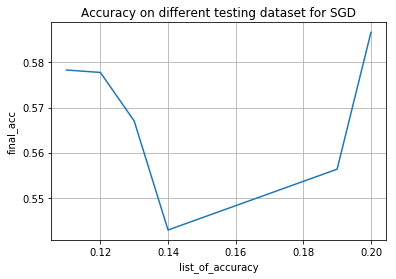

In [6]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()

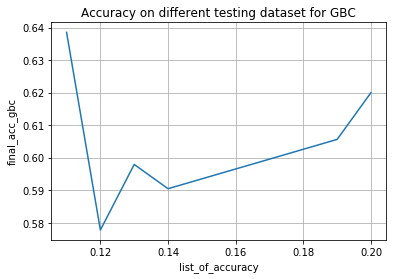

In [7]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc_gbc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()

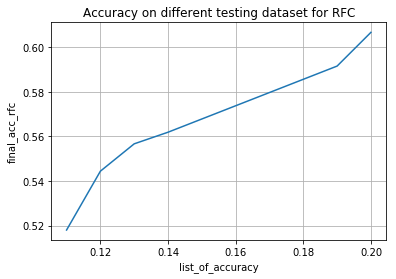

In [8]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc_rfc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()

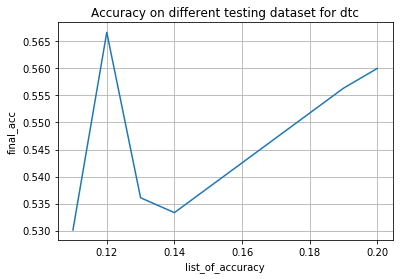

In [9]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for dtc')
grid(True)
show()

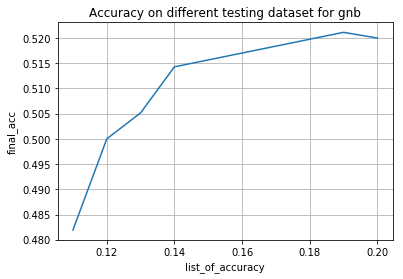

In [10]:
from pylab import *
plot(list_of_accuracy,set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for gnb')
grid(True)
show()

PCA Inception

In [11]:
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
list_of_accuracy=[0.11,0.12,0.13,0.14,0.19,0.20]
# list_of_accuracy=[0.19,0.20]
pca_set_of_accuracy=[]
pca_set_of_accuracy_sgd=[]
pca_set_of_accuracy_gbc=[]
pca_set_of_accuracy_rfc=[]
pca_set_of_accuracy_gnb=[]
pca_set_of_accuracy_dtc=[]

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_pca = inception.predict(X_train)
    test_features_pca = inception.predict(X_test)
    pca = PCA(n_components=400)
    pca.fit(training_features_pca)
    pca_training_features = pca.fit_transform(training_features_pca)
    pca_test_features=pca.transform(test_features_pca)
    # linear SVC
    clf = Classifier()
    clf.fit(pca_training_features, y_train)
    y_predict = clf.predict(pca_test_features)
    pca_acc_SVC = clf.score(pca_test_features, y_test)
    pca_set_of_accuracy.append(pca_acc_SVC)
    # SGD
    pca_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    pca_clf_sgd.fit(pca_training_features, y_train)
    y_predict = pca_clf_sgd.predict(pca_test_features)
    pca_acc_sgd = pca_clf_sgd.score(pca_test_features, y_test)
    pca_set_of_accuracy_sgd.append(pca_acc_sgd) 
#     #GBC
    pca_clf_gbc = GradientBoostingClassifier()
    pca_clf_gbc.fit(pca_training_features, y_train)
    y_predict_gbc = pca_clf_gbc.predict(pca_test_features)
    pca_acc_gbc = pca_clf_gbc.score(pca_test_features, y_test)
    pca_set_of_accuracy_gbc.append(pca_acc_gbc) 
#     # RFC
    pca_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    pca_rfc_clf.fit(pca_training_features, y_train)
    y_predict_regr = pca_rfc_clf.predict(pca_test_features)
    pca_acc_regr = pca_rfc_clf.score(pca_test_features, y_test)
    pca_set_of_accuracy_rfc.append(pca_acc_regr)
#     # NB
    pca_clf_gnb = GaussianNB()
    pca_clf_gnb.fit(pca_training_features, y_train)
    y_predict_gnb = pca_clf_gnb.score(pca_test_features, y_test)
    pca_acc_gbn = pca_clf_gnb.score(pca_test_features, y_test)
    pca_set_of_accuracy_gnb.append(pca_acc_gbn)
#     # DTC
    pca_clf_dtc = DecisionTreeClassifier(random_state=0)
    pca_clf_dtc.fit(pca_training_features, y_train)
    y_predict_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_acc_dtc = pca_clf_dtc.score(pca_test_features, y_test)
    pca_set_of_accuracy_dtc.append(pca_acc_dtc)   

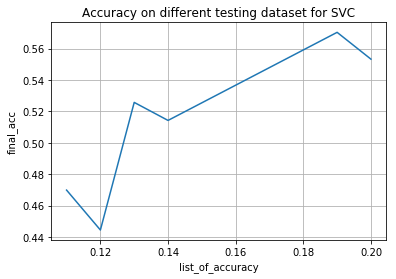

In [12]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()

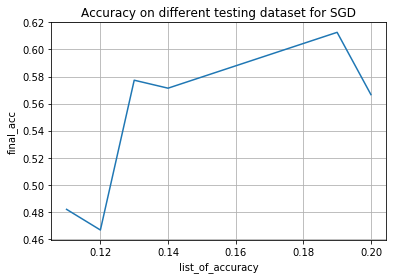

In [13]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()

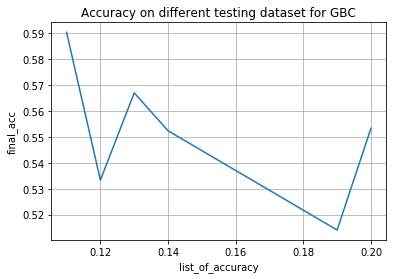

In [14]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()

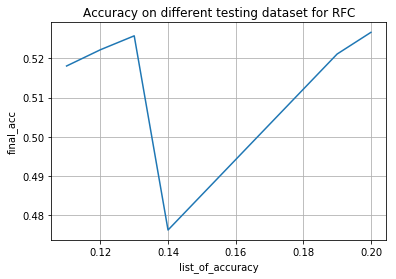

In [15]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()

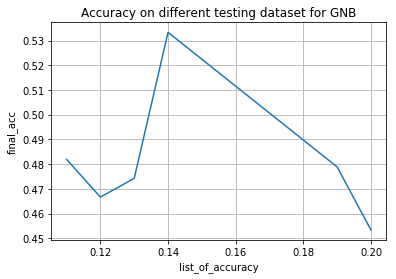

In [16]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GNB')
grid(True)
show()

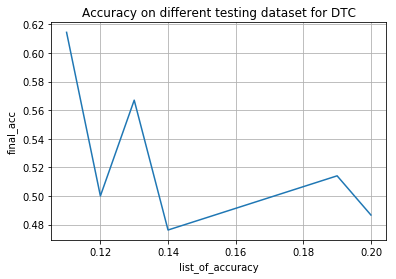

In [17]:
from pylab import *
plot(list_of_accuracy,pca_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()

SVM

In [24]:
from sklearn.svm import LinearSVC as Classifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
list_of_accuracy=[0.11,0.12,0.13,0.14,0.19,0.20]
# list_of_accuracy=[0.19,0.20]
svd_set_of_accuracy=[]
svd_set_of_accuracy_sgd=[]
svd_set_of_accuracy_gbc=[]
svd_set_of_accuracy_rfc=[]
svd_set_of_accuracy_gnb=[]
svd_set_of_accuracy_dtc=[]

for i in list_of_accuracy:    
    X_train, X_test, y_train, y_test = train_test_split(np_X_data_1, np_Y_data_1, test_size=i, random_state=80)
    training_features_svd = inception.predict(X_train)
    test_features_svd = inception.predict(X_test)
    svd = TruncatedSVD(n_components=550,n_iter=7)
    svd.fit(training_features_svd)
    svd_training_features = svd.fit_transform(training_features_svd)
    svd_test_features=svd.transform(test_features_svd)
    # linear SVC
    clf = Classifier()
    clf.fit(svd_training_features, y_train)
    y_predict = clf.predict(svd_test_features)
    svd_acc_SVC = clf.score(svd_test_features, y_test)
    svd_set_of_accuracy.append(svd_acc_SVC)
    # SGD
    svd_clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    svd_clf_sgd.fit(svd_training_features, y_train)
    y_predict = svd_clf_sgd.predict(svd_test_features)
    svd_acc_sgd = svd_clf_sgd.score(svd_test_features, y_test)
    svd_set_of_accuracy_sgd.append(svd_acc_sgd) 
#     #GBC
    svd_clf_gbc = GradientBoostingClassifier()
    svd_clf_gbc.fit(svd_training_features, y_train)
    y_predict_gbc = svd_clf_gbc.predict(svd_test_features)
    svd_acc_gbc = svd_clf_gbc.score(svd_test_features, y_test)
    svd_set_of_accuracy_gbc.append(svd_acc_gbc) 
#     # RFC
    svd_rfc_clf =  RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    svd_rfc_clf.fit(svd_training_features, y_train)
    y_predict_regr = svd_rfc_clf.predict(svd_test_features)
    svd_acc_regr = svd_rfc_clf.score(svd_test_features, y_test)
    svd_set_of_accuracy_rfc.append(svd_acc_regr)
#     # NB
    svd_clf_gnb = GaussianNB()
    svd_clf_gnb.fit(svd_training_features, y_train)
    y_predict_gnb = svd_clf_gnb.score(svd_test_features, y_test)
    svd_acc_gbn = svd_clf_gnb.score(svd_test_features, y_test)
    svd_set_of_accuracy_gnb.append(svd_acc_gbn)
#     # DTC
    svd_clf_dtc = DecisionTreeClassifier(random_state=0)
    svd_clf_dtc.fit(svd_training_features, y_train)
    y_predict_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_acc_dtc = svd_clf_dtc.score(svd_test_features, y_test)
    svd_set_of_accuracy_dtc.append(svd_acc_dtc)   

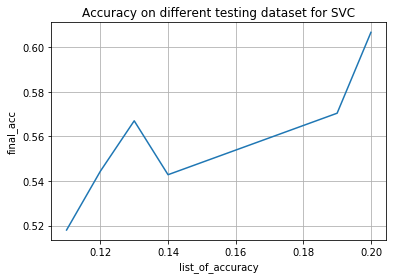

In [25]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()

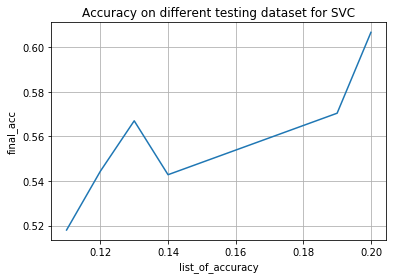

In [26]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SVC')
grid(True)
show()

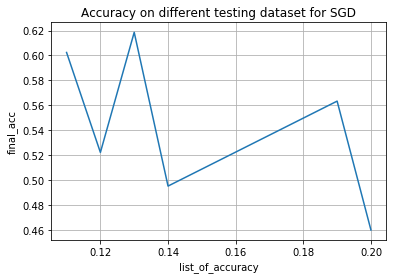

In [32]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy_sgd)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for SGD')
grid(True)
show()

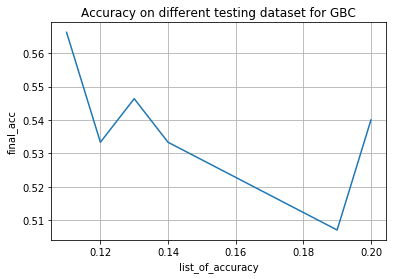

In [28]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy_gbc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for GBC')
grid(True)
show()

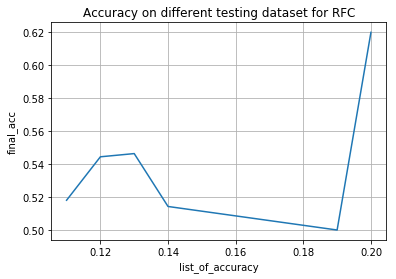

In [29]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy_rfc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for RFC')
grid(True)
show()

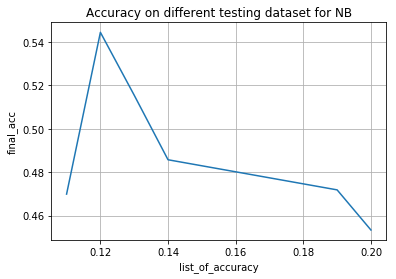

In [30]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy_gnb)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for NB')
grid(True)
show()

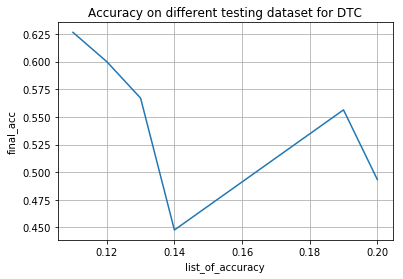

In [31]:
from pylab import *
plot(list_of_accuracy,svd_set_of_accuracy_dtc)
xlabel('list_of_accuracy')
ylabel('final_acc')
title('Accuracy on different testing dataset for DTC')
grid(True)
show()